In [1]:
print("sairam")

sairam


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [3]:
train = pd.read_csv('train_wn75k28.csv')
print('# of rows   :', train.shape[0])
print('# of columns:', train.shape[1])

# of rows   : 39161
# of columns: 19


In [4]:
#Check for NULL values
train.isnull().mean()

id                      0.000000
created_at              0.000000
campaign_var_1          0.000000
campaign_var_2          0.000000
products_purchased      0.533975
signup_date             0.385920
user_activity_var_1     0.000000
user_activity_var_2     0.000000
user_activity_var_3     0.000000
user_activity_var_4     0.000000
user_activity_var_5     0.000000
user_activity_var_6     0.000000
user_activity_var_7     0.000000
user_activity_var_8     0.000000
user_activity_var_9     0.000000
user_activity_var_10    0.000000
user_activity_var_11    0.000000
user_activity_var_12    0.000000
buy                     0.000000
dtype: float64

<b> Observations </b> <br>
53% of products_purchased are missing <br>
38% of Signup date are missing

In [5]:
#Check the label distribution

print(train['buy'].value_counts())

print('Ratio of buy to not-buy is {0:.3f} %'.format(train['buy'].value_counts()[1]/train['buy'].value_counts()[0] * 100 ))

0    37163
1     1998
Name: buy, dtype: int64
Ratio of buy to not-buy is 5.376 %


<b> Imbalanced Data with respect to labels

In [6]:
print(train['created_at'].dtype)
print(train['signup_date'].dtype)
print('\n')
print('Created date:', train['created_at'].head())
print('\n')
print('signup_date:', train['signup_date'].head())

object
object


Created date: 0    2021-01-01
1    2021-01-01
2    2021-01-01
3    2021-01-01
4    2021-01-01
Name: created_at, dtype: object


signup_date: 0    2020-09-24
1    2020-09-19
2    2021-08-11
3    2017-10-04
4    2020-06-08
Name: signup_date, dtype: object


#### Convert the date attributes to  date format from the type object

In [7]:
train['created_at']  = pd.to_datetime(train['created_at'], errors='ignore', yearfirst=True)
train['signup_date'] = pd.to_datetime(train['signup_date'], errors='ignore', yearfirst=True)

print(train['created_at'].dtype, train['signup_date'].dtype)

datetime64[ns] datetime64[ns]


In [8]:
train.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy'],
      dtype='object')

#### Exploratory Data Analysis

#### Created_at

In [9]:
train['created_at'].value_counts()

2021-12-26    181
2021-12-09    180
2021-12-21    179
2021-12-07    179
2021-12-04    178
             ... 
2021-01-07     34
2021-01-14     33
2021-01-06     29
2021-01-22     26
2021-01-01     21
Name: created_at, Length: 365, dtype: int64

In [10]:
train[train['created_at'] < train['signup_date']]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
9,10,2021-01-01,3,6,2.0,2021-10-20,0,0,0,0,0,1,0,0,0,0,1,0,0
15,16,2021-01-01,7,2,NaN,2021-03-09,0,0,0,0,0,0,0,0,0,0,0,0,0
17,18,2021-01-01,5,6,NaN,2021-10-20,0,0,0,0,0,1,0,1,0,0,0,0,0
20,21,2021-01-01,4,2,NaN,2021-07-22,0,0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39000,39001,2021-12-30,2,2,NaN,2022-03-20,0,0,0,0,1,0,1,0,0,0,0,0,0
39053,39054,2021-12-31,9,10,1.0,2022-02-15,0,0,0,0,0,1,0,0,0,0,0,0,0
39062,39063,2021-12-31,7,9,1.0,2022-01-11,0,0,0,0,0,0,0,0,0,0,0,0,0
39082,39083,2021-12-31,6,5,2.0,2022-03-12,1,0,0,0,0,1,1,0,0,0,0,0,0


In [11]:
train[train['created_at'] < train['signup_date']]['buy'].value_counts()

0    5485
1     359
Name: buy, dtype: int64

In [12]:
359/5485 * 100

6.545123062898815

In [13]:
train[train['created_at'] > train['signup_date']]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
5,6,2021-01-01,3,4,3.0,2019-07-02,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39148,39149,2021-12-31,9,6,NaN,2020-04-12,0,0,0,0,0,1,0,0,0,0,1,0,0
39149,39150,2021-12-31,1,5,3.0,2021-05-20,0,0,0,0,0,0,1,0,0,0,0,0,0
39154,39155,2021-12-31,7,11,3.0,2020-11-03,0,0,0,0,0,1,0,0,0,0,0,0,0
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0


In [14]:
train[train['created_at'] > train['signup_date']]['buy'].value_counts()

0    16570
1     1612
Name: buy, dtype: int64

In [15]:
1612/16570 * 100

9.728424864212432

In [16]:
train[train['created_at'] == train['signup_date']]['buy'].value_counts()

0    20
1     2
Name: buy, dtype: int64

In [17]:
train[train['signup_date'].isnull()]['buy'].value_counts()

0    15088
1       25
Name: buy, dtype: int64

### Observations <br>
Not very clear but below is my instinct - Assumption: created_at means customer termination <br>
1) Scenario 1: Created_at > sign up date (logically expected) - customer gets terminated after a while since he has signed up <br> Here 9.5% of potential leads have been observed <br>
<br>

2) Scenario 2: Created_at < Sign up date: I feel customer who has been considered as non-potential or dropped, still they have become potential leads/actual client in the future. In this case, we have 6.5% of potential leads <br>

3) Scenario 3: Created date == Sign update: Just 20 records were noticed and still 2 potential leads observed. This confirms the point2. Customers who might have dropped have still become potential leads and coincdently in the same date <br>

4) <b> Scenario 4: Sign up date is 38% empty </b> <br>
    Out of 15088 records which has empty signup_date, only 25 records have observed potential leads

In [18]:
def map_date_ind(val):
    #print(val)
    created_at = val[0]
    signup_date = val[1]
    if created_at > signup_date:
        return ('Normal')
    elif created_at < signup_date:
        return ('Re-activated')
    elif created_at == signup_date:
        return ('Same_Day')
    elif pd.isnull(train.iloc[39158]['signup_date']):
        return ('Missing')
    else:
        return ('Error')
        

In [19]:
train['date_flag'] = train[['created_at', 'signup_date']].apply(map_date_ind, axis=1)

In [20]:
train['date_flag'].value_counts()

Normal          18182
Missing         15113
Re-activated     5844
Same_Day           22
Name: date_flag, dtype: int64

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date_flag', ylabel='count'>

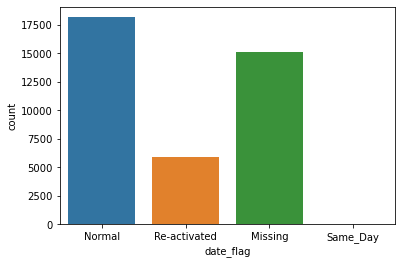

In [21]:
sns.countplot(train['date_flag'])

<AxesSubplot:xlabel='date_flag'>

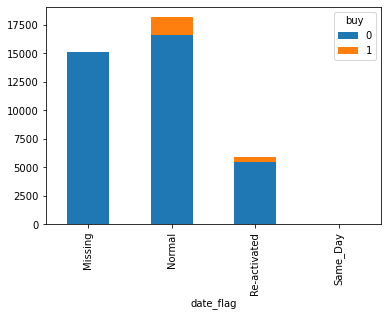

In [22]:
train.groupby(['date_flag', 'buy'])['buy'].count().unstack().plot(kind='bar', stacked=True)

In [23]:
print(train.groupby('created_at')['buy'].count().sort_values(ascending=False))
print('\n')
print(train.groupby('signup_date')['buy'].count().sort_values(ascending=False))

created_at
2021-12-26    181
2021-12-09    180
2021-12-21    179
2021-12-07    179
2021-12-04    178
             ... 
2021-01-07     34
2021-01-14     33
2021-01-06     29
2021-01-22     26
2021-01-01     21
Name: buy, Length: 365, dtype: int64


signup_date
2021-07-18    45
2021-09-20    38
2021-08-03    38
2021-09-10    38
2021-01-28    38
              ..
2017-09-27     1
2017-09-24     1
2017-09-17     1
2017-09-13     1
2015-02-07     1
Name: buy, Length: 1800, dtype: int64


<AxesSubplot:xlabel='created_at'>

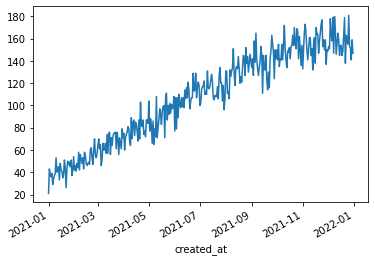

In [24]:
train.groupby('created_at')['buy'].count().sort_values(ascending=False).plot()

<AxesSubplot:xlabel='signup_date'>

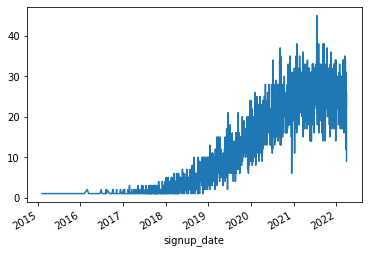

In [25]:
train.groupby('signup_date')['buy'].count().sort_values(ascending=False).plot()

##### campaign_var_1

6     4061
5     4060
4     4018
3     3784
7     3756
2     3486
8     3407
9     2866
10    2392
11    1873
1     1593
12    1455
13    1059
14     714
15     456
16     181
Name: campaign_var_1, dtype: int64


<AxesSubplot:>

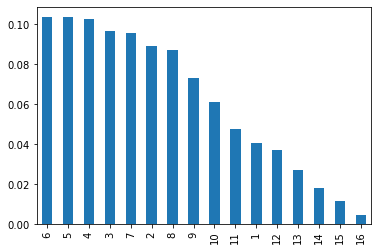

In [26]:
print(train['campaign_var_1'].value_counts())
train['campaign_var_1'].value_counts(normalize=True).plot(kind='bar')

In [27]:
camp1_df = pd.DataFrame(train.groupby(['campaign_var_1', 'buy'])['buy'].count().unstack()).reset_index().sort_values(by=1, ascending=False)
camp1_df['ratio'] = camp1_df[1]/camp1_df[0]
camp1_df.sort_values(by='ratio', ascending=False)

buy,campaign_var_1,0,1,ratio
2,3,3508.0,276.0,0.078677
1,2,3237.0,249.0,0.076923
3,4,3741.0,277.0,0.074044
4,5,3793.0,267.0,0.070393
0,1,1496.0,97.0,0.064840
5,6,3833.0,228.0,0.059483
6,7,3557.0,199.0,0.055946
7,8,3255.0,152.0,0.046697
8,9,2763.0,103.0,0.037278
10,11,1825.0,48.0,0.026301


# Observations <br>
camp1 = 3,2,4,5 ==> Shows 7% of potential leads <br>
camp1 = 1, 6 & 7 ==> shows > 5% of potential leads <br>

<AxesSubplot:xlabel='campaign_var_1'>

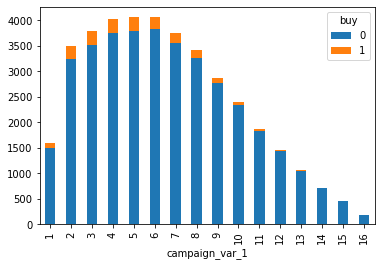

In [28]:
train.groupby(['campaign_var_1', 'buy'])['buy'].count().unstack().plot(kind='bar', stacked=True)

#### campaign_var_2

6     5744
7     5472
5     5250
8     4690
4     4213
9     3537
3     2883
10    2298
2     1788
11    1410
12     761
1      589
13     351
14     151
15      24
Name: campaign_var_2, dtype: int64


<AxesSubplot:>

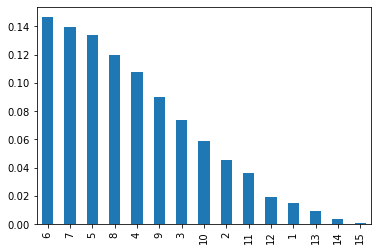

In [29]:
print(train['campaign_var_2'].value_counts())
train['campaign_var_2'].value_counts(normalize=True).plot(kind='bar')

In [30]:
camp2_df = pd.DataFrame(train.groupby(['campaign_var_2', 'buy'])['buy'].count().unstack()).reset_index().sort_values(by=1, ascending=False)
camp2_df['ratio'] = camp2_df[1]/camp2_df[0]
camp2_df.sort_values('ratio', ascending=False)

buy,campaign_var_2,0,1,ratio
3,4,3885.0,328.0,0.084427
4,5,4870.0,380.0,0.078029
5,6,5379.0,365.0,0.067856
2,3,2713.0,170.0,0.062661
1,2,1684.0,104.0,0.061758
6,7,5179.0,293.0,0.056575
7,8,4501.0,189.0,0.041991
0,1,567.0,22.0,0.038801
8,9,3435.0,102.0,0.029694
9,10,2264.0,34.0,0.015018


#### Observations <br>
Camp2 = 4 yields 8% of potential leads <br>
camp2 = 5,6,3,2 has more then 6% of potential leads

Commonly, camp1 and 2 with values 2,3,4,5 has more than 6% of potential leads <b>

In [31]:
print(train[(train['campaign_var_2'] == 4) & (train['campaign_var_1'] == 3)]['buy'].value_counts())
print('Ratio of potential to leads - non-pot leads when camp_var1 == 3 & camp_var_2 ==4 is {0:.6f} %'.format(77/618 * 100))

print('\n')

print(train[(train['campaign_var_2'] == 5) & (train['campaign_var_1'] == 2)]['buy'].value_counts())
print('Ratio of potential to leads - non-pot leads when camp_var1 == 2 & camp_var_2 == 5 is {0:.6f} %'.format(47/531 * 100))

print('\n')

print(train[(train['campaign_var_2'] == 6) & (train['campaign_var_1'] == 4)]['buy'].value_counts())
print('Ratio of potential to leads - non-pot leads when camp_var1 == 4 & camp_var_2 == 6 is {0:.6f} %'.format(60/630 * 100))

0    618
1     77
Name: buy, dtype: int64
Ratio of potential to leads - non-pot leads when camp_var1 == 3 & camp_var_2 ==4 is 12.459547 %


0    531
1     47
Name: buy, dtype: int64
Ratio of potential to leads - non-pot leads when camp_var1 == 2 & camp_var_2 == 5 is 8.851224 %


0    630
1     60
Name: buy, dtype: int64
Ratio of potential to leads - non-pot leads when camp_var1 == 4 & camp_var_2 == 6 is 9.523810 %


##### Inferences: <br>
<b> Camp_var1 & camp_var_2 are significant towards the target <b>

#### products_purchased

In [32]:
#missing values
train['products_purchased'].isnull().mean()

0.5339751283164372

In [33]:
print('# of unique products is {}'.format(train['products_purchased'].nunique()))
print('\n')
print('Unique products is {}'.format(train['products_purchased'].unique()))

# of unique products is 4


Unique products is [ 2.  3. nan  1.  4.]


In [34]:
#Lets fill the missing values with 0 
train['products_purchased'] = train['products_purchased'].fillna(value=0)

In [35]:
prod_purchased_df = train.groupby(['products_purchased', 'buy'])['buy'].count().unstack().reset_index()
prod_purchased_df['ratio'] = prod_purchased_df[1]/prod_purchased_df[0]
prod_purchased_df.sort_values(by='ratio', ascending=False)

buy,products_purchased,0,1,ratio
4,4.0,642,74,0.115265
1,1.0,3401,242,0.071156
3,3.0,4770,254,0.053249
0,0.0,19866,1045,0.052602
2,2.0,8484,383,0.045144


In [36]:
temp = train[train['signup_date'].isnull()]
temp = temp[temp['products_purchased'] == 0]
temp['buy'].value_counts()

0    11244
1       17
Name: buy, dtype: int64

In [37]:
17/11244

0.001511917467093561

#### If there is no signup date, meaning customer not signed and also not even a product is purhcased, then the possibility for being a potential lead is very less - 0.1%

##### user_activity_var_*

In [38]:
print('# of unique value in user_activity_var_1:', train['user_activity_var_1'].nunique())
print('Unique value in user_activity_var_1:', train['user_activity_var_1'].unique())

# of unique value in user_activity_var_1: 4
Unique value in user_activity_var_1: [0 1 2 3]


In [39]:
user_act1_df = train.groupby(['user_activity_var_1', 'buy'])['buy'].count().unstack().reset_index()
user_act1_df['ratio'] = user_act1_df[1]/user_act1_df[0]
user_act1_df.sort_values(by='ratio', ascending=False, inplace=True)
user_act1_df

buy,user_activity_var_1,0,1,ratio
2,2,319.0,55.0,0.172414
1,1,14031.0,886.0,0.063146
0,0,22812.0,1057.0,0.046335
3,3,1.0,NaN,NaN


C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


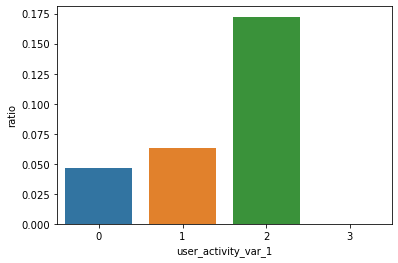

In [40]:
sns.barplot(user_act1_df['user_activity_var_1'], user_act1_df['ratio'])
plt.show()

<b> If user activity 1 == 2 then probability of being a potential lead is 17% </b>



******** user_activity_var_2 *******
# of unique value in user_activity_var_2: 2
Unique value in user_activity_var_2     : [0 1]
buy  user_activity_var_2        0       1     ratio
0                      0  37163.0  1735.0  0.046686
1                      1      NaN   263.0       NaN


C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


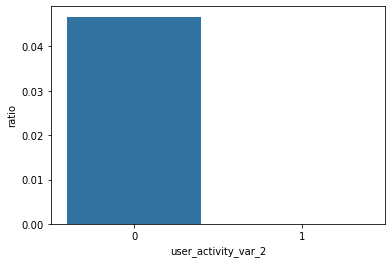



******** user_activity_var_3 *******
# of unique value in user_activity_var_3: 2
Unique value in user_activity_var_3     : [0 1]
buy  user_activity_var_3      0     1     ratio
1                      1   3808   219  0.057511
0                      0  33355  1779  0.053335


C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


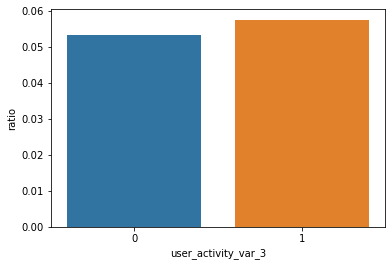

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(




******** user_activity_var_4 *******
# of unique value in user_activity_var_4: 2
Unique value in user_activity_var_4     : [0 1]
buy  user_activity_var_4      0     1     ratio
1                      1     64   385  6.015625
0                      0  37099  1613  0.043478


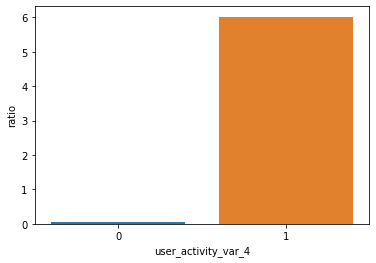

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(




******** user_activity_var_5 *******
# of unique value in user_activity_var_5: 3
Unique value in user_activity_var_5     : [0 1 2]
buy  user_activity_var_5        0       1     ratio
1                      1   5119.0   782.0  0.152764
0                      0  32044.0  1200.0  0.037449
2                      2      NaN    16.0       NaN


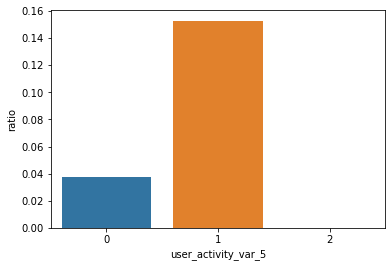



******** user_activity_var_6 *******
# of unique value in user_activity_var_6: 4
Unique value in user_activity_var_6     : [0 1 2 3]
buy  user_activity_var_6        0       1     ratio
0                      0  19678.0  1099.0  0.055849
1                      1  16357.0   852.0  0.052088
2                      2   1113.0    47.0  0.042228
3                      3     15.0     NaN       NaN


C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


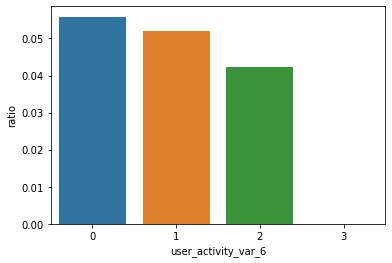



******** user_activity_var_7 *******
# of unique value in user_activity_var_7: 3
Unique value in user_activity_var_7     : [1 0 2]
buy  user_activity_var_7        0       1     ratio
0                      0  26464.0  1537.0  0.058079
1                      1  10635.0   461.0  0.043347
2                      2     64.0     NaN       NaN


C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


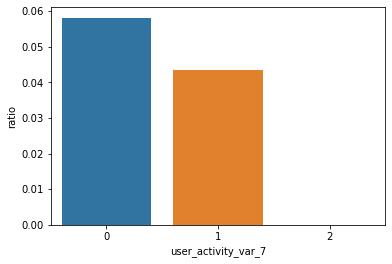



******** user_activity_var_8 *******
# of unique value in user_activity_var_8: 3
Unique value in user_activity_var_8     : [1 0 2]
buy  user_activity_var_8        0       1     ratio
0                      0  30365.0  1968.0  0.064811
1                      1   6795.0    30.0  0.004415
2                      2      3.0     NaN       NaN


C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


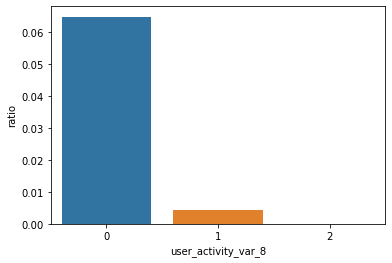



******** user_activity_var_9 *******
# of unique value in user_activity_var_9: 2
Unique value in user_activity_var_9     : [0 1]
buy  user_activity_var_9        0       1     ratio
0                      0  37163.0  1550.0  0.041708
1                      1      NaN   448.0       NaN


C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


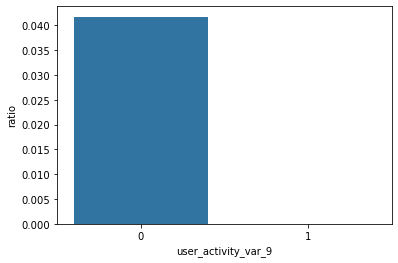

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(




******** user_activity_var_10 *******
# of unique value in user_activity_var_10: 2
Unique value in user_activity_var_10     : [0 1]
buy  user_activity_var_10        0       1    ratio
0                       0  37163.0  1983.0  0.05336
1                       1      NaN    15.0      NaN


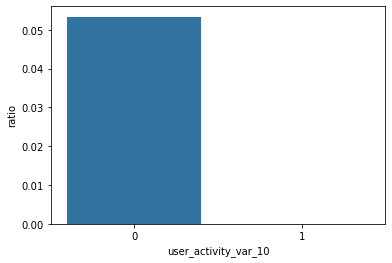

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(




******** user_activity_var_11 *******
# of unique value in user_activity_var_11: 5
Unique value in user_activity_var_11     : [0 1 2 3 4]
buy  user_activity_var_11        0      1      ratio
2                       2      3.0  220.0  73.333333
1                       1   7134.0  921.0   0.129100
0                       0  30026.0  833.0   0.027743
3                       3      NaN   23.0        NaN
4                       4      NaN    1.0        NaN


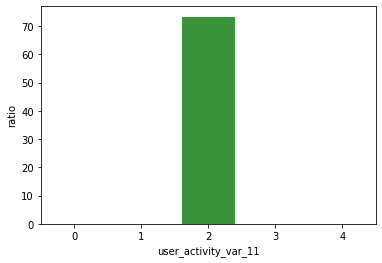



******** user_activity_var_12 *******
# of unique value in user_activity_var_12: 2


C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Unique value in user_activity_var_12     : [0 1]
buy  user_activity_var_12      0     1     ratio
1                       1      7    15  2.142857
0                       0  37156  1983  0.053370


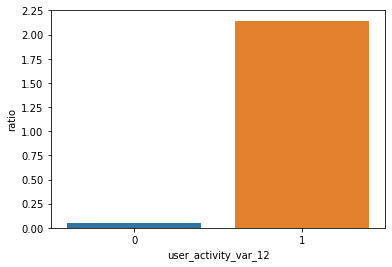

In [41]:
cols = ['user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12']

for col in cols:
    print('\n')
    print('********', col, '*******')
    print('# of unique value in {}: {}'.format(col, train[col].nunique()))
    print('Unique value in {}     : {}'.format(col, train[col].unique()))
    
    user_act_df = train.groupby([col, 'buy'])['buy'].count().unstack().reset_index()
    user_act_df['ratio'] = user_act_df[1]/user_act_df[0]
    user_act_df.sort_values(by='ratio', ascending=False, inplace=True)
    print(user_act_df)
    
    sns.barplot(user_act_df[col], user_act_df['ratio'])
    plt.show()
    
    
    
    

<b> Observations </b>

Useractivity_2 == 1 ==> all are potential leads only <br>
Useractivity_4 == 1 ==> > 85% potential leads only <br>
Useractivity_8 == 1 ==> > least chance of being potential lead <br>
Useractivity_9 == 1 ==> > least chance of being potential lead <br>
Useractivity_11 == 2 ==> > Good chance of being potential lead <br>

#### Encode the date indicator flag

In [42]:
one_hot_encoded_data = pd.get_dummies(train, columns = ['date_flag'])
print(one_hot_encoded_data.columns)
one_hot_encoded_data

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy',
       'date_flag_Missing', 'date_flag_Normal', 'date_flag_Re-activated',
       'date_flag_Same_Day'],
      dtype='object')


,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,date_flag_Missing,date_flag_Normal,date_flag_Re-activated,date_flag_Same_Day
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,2021-01-01,4,6,0.0,2020-06-08,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39157,39158,2021-12-31,3,9,3.0,NaT,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaT,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
39159,39160,2021-12-31,7,12,2.0,NaT,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


#### Multi collinear check

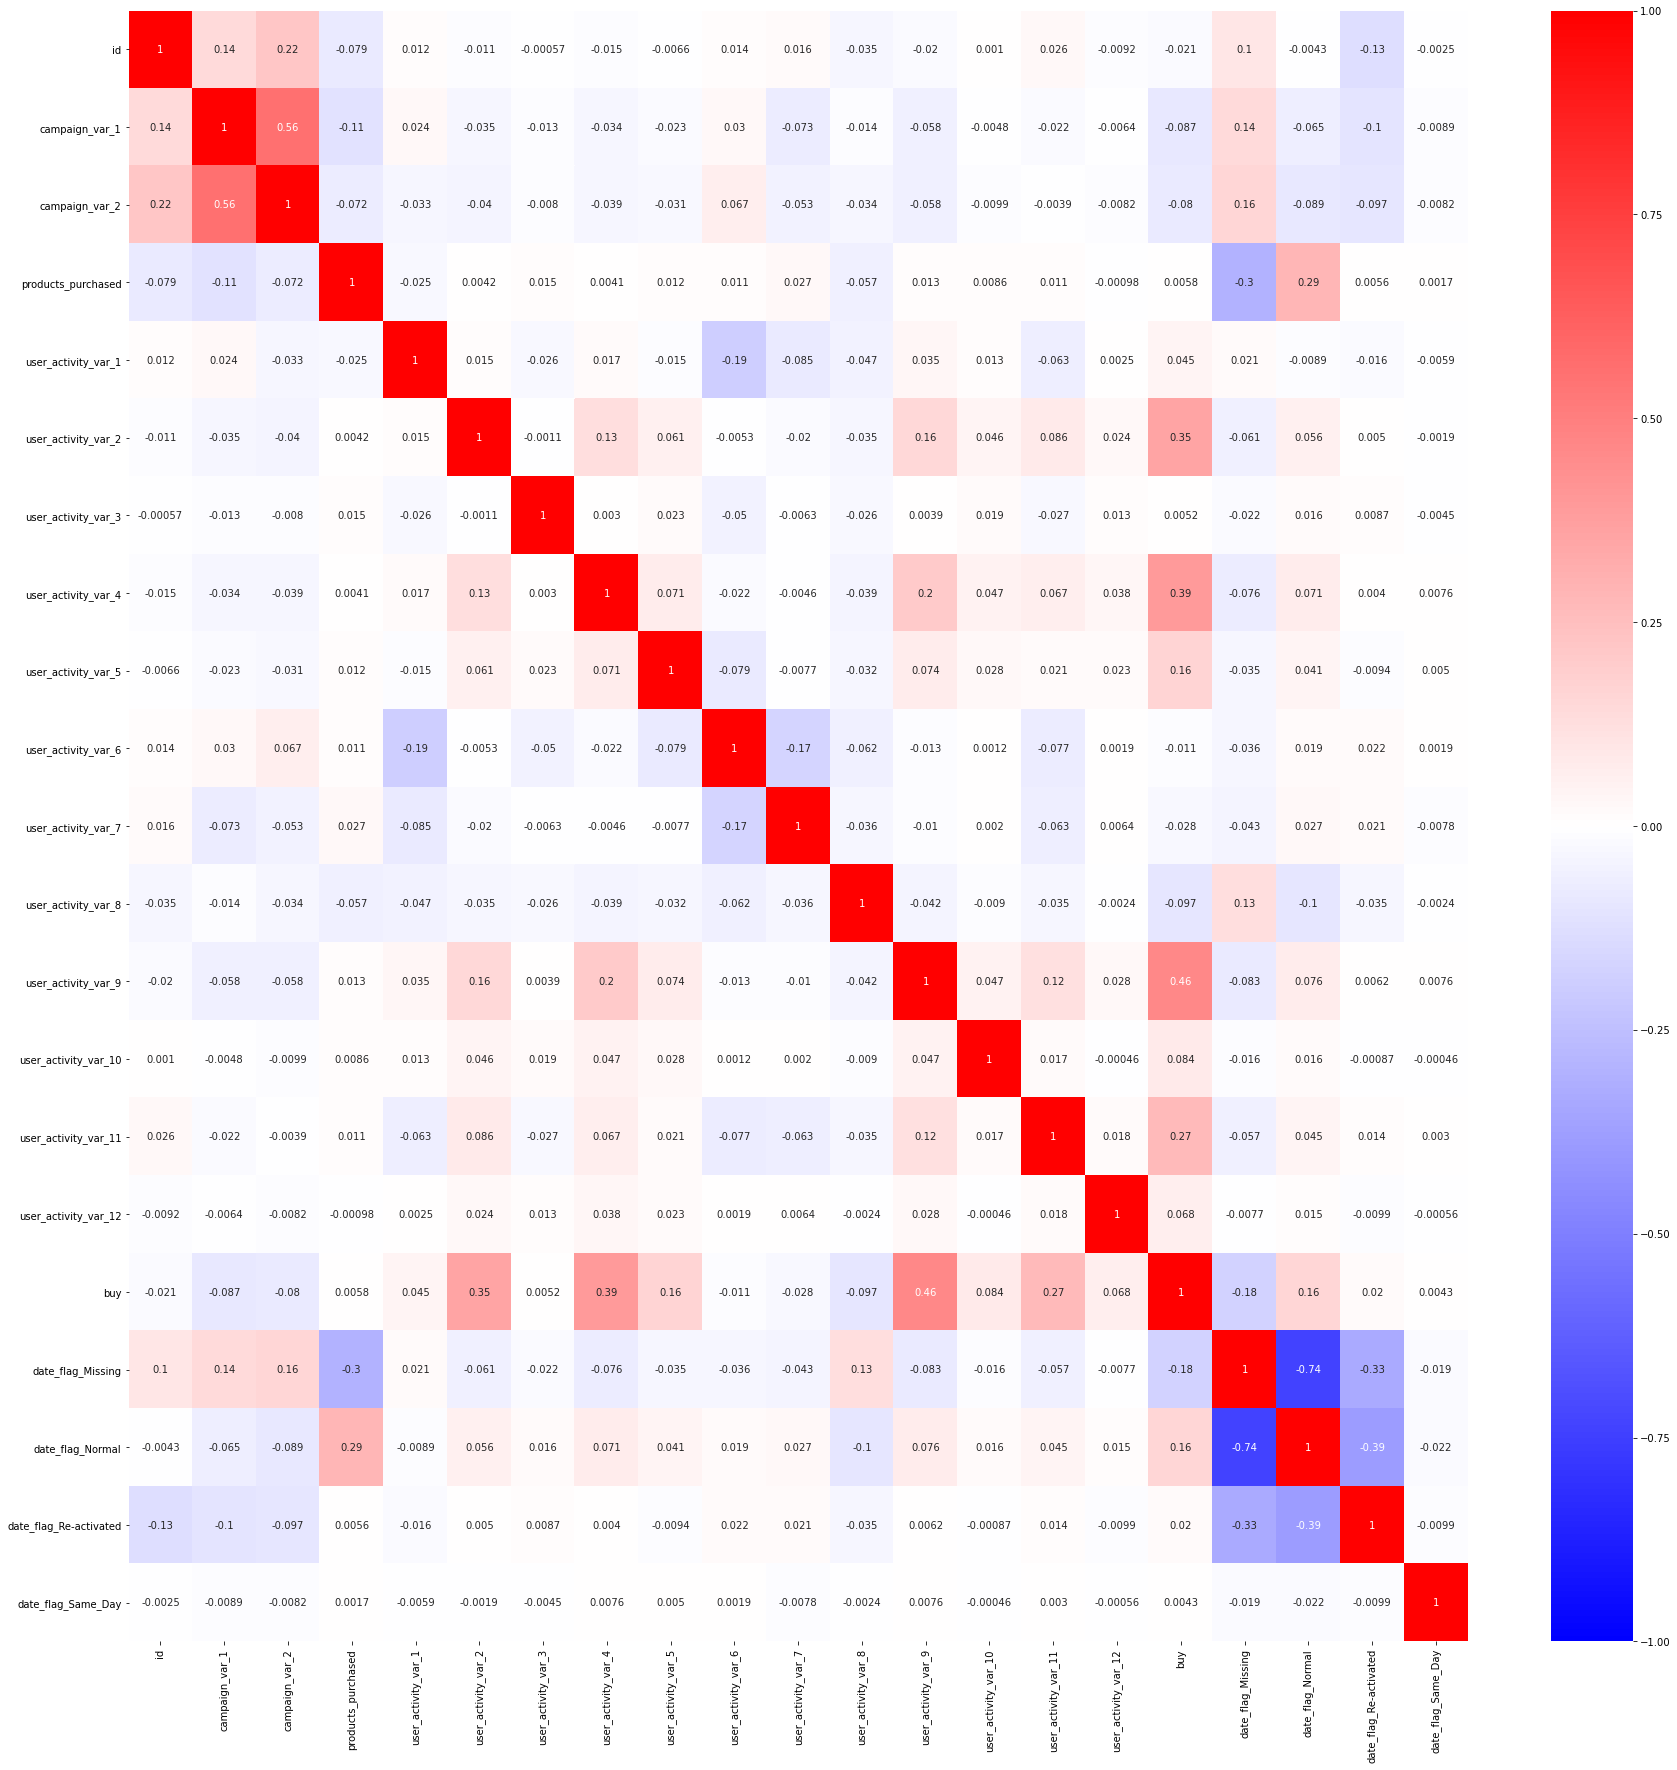

In [43]:
plt.figure(figsize=(30,30))
sns.heatmap(one_hot_encoded_data.corr(), annot=True, vmin=-1, vmax=1, cmap='bwr')
plt.show()

#### Model <br>

1) Drop the dates <br> 
2) Have the date indicator flag <br>
3) Have all other capaign & user activity variables


In [44]:
X = one_hot_encoded_data.drop(['id', 'created_at', 'signup_date', 'buy'], axis=1)
Y = one_hot_encoded_data['buy']

print('Shape of X is {}'.format(X.shape))
print('Shape of Y is {}'.format(Y.shape))

print(X.head(), Y.head())

Shape of X is (39161, 19)
Shape of Y is (39161,)
   campaign_var_1  campaign_var_2  products_purchased  user_activity_var_1  \
0               1               2                 2.0                    0   
1               2               1                 2.0                    1   
2               9               3                 3.0                    1   
3               6               7                 2.0                    0   
4               4               6                 0.0                    0   

   user_activity_var_2  user_activity_var_3  user_activity_var_4  \
0                    0                    0                    0   
1                    0                    1                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   user_activity_var_5  user_activity_var_6  user_activity_var_7  \
0    

##### Train Test Split

In [45]:
X_train, X_test,y_train, y_test=train_test_split(X,Y,test_size=0.3,random_state=17)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(27412, 19) (11749, 19) (27412,) (11749,)


### Baseline model

In [521]:
base_rfclr = RandomForestClassifier(random_state=17)
base_rfclr.fit(X_train, y_train)
print('train accuracy is {}'.format(base_rfclr.score(X_train, y_train)))
print('test  accuracy is {}'.format(base_rfclr.score(X_test, y_test)))

train accuracy is 0.9903691813804173
test  accuracy is 0.9703804579113116


In [523]:
base_rfclr.feature_importances_

array([1.24735053e-01, 1.14905507e-01, 4.77744834e-02, 2.95783270e-02,
       1.12758807e-01, 1.24235997e-02, 1.27166413e-01, 2.97036932e-02,
       2.94059176e-02, 1.68530741e-02, 8.86215463e-03, 1.77109779e-01,
       3.52671689e-03, 1.26266213e-01, 4.30290232e-03, 1.98387519e-02,
       1.00365616e-02, 4.61686902e-03, 1.35176945e-04])

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


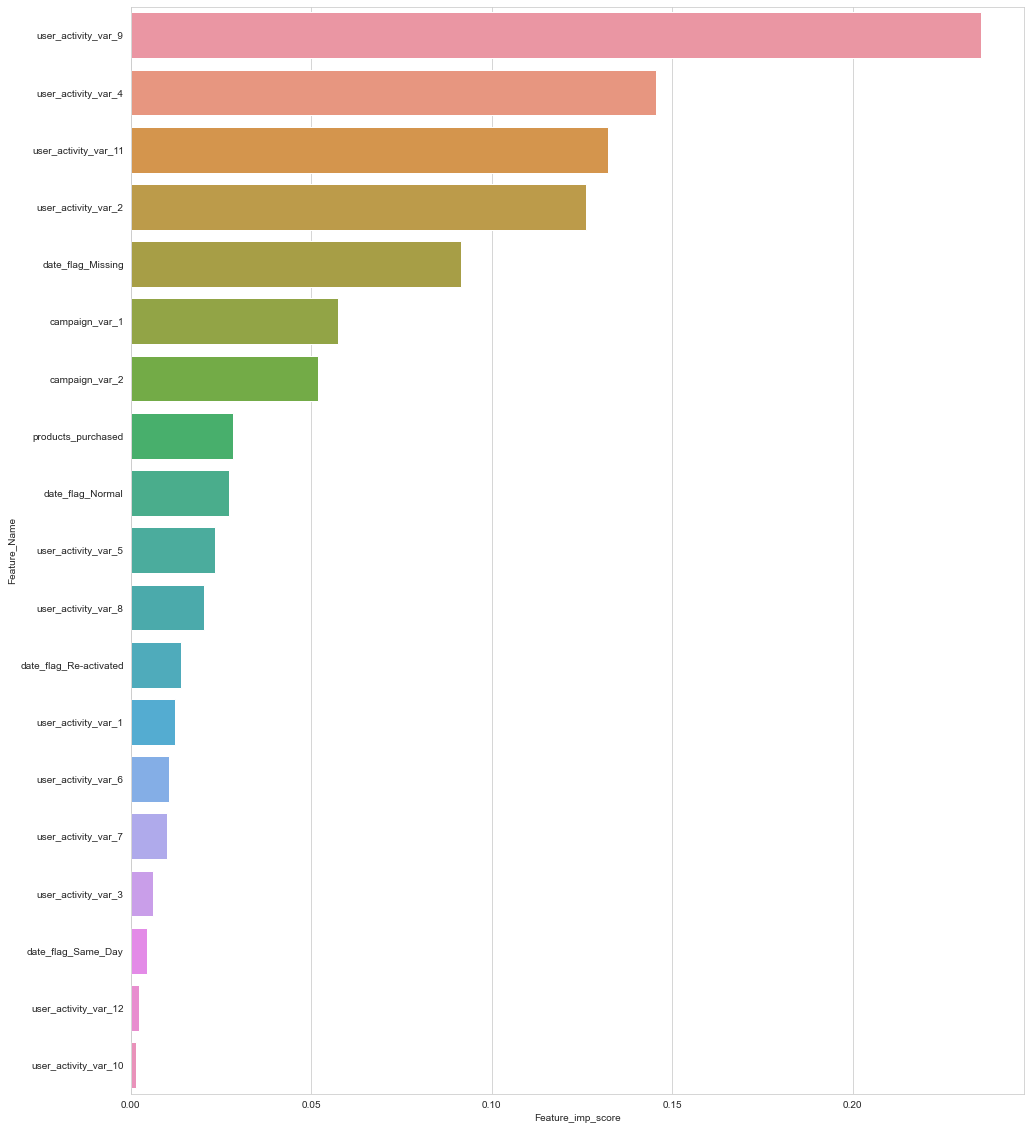

In [524]:
base_rfclr.feature_importances_
ft = list(feature_imp)
cl = list(X.columns)
mapped = list(zip(ft, cl))
mapped
ft_imp_df = pd.DataFrame(mapped, columns=['Feature_imp_score', 'Feature_Name'])
ft_imp_df = ft_imp_df.sort_values('Feature_imp_score', ascending=False)
plt.figure(figsize=(16,20))
sns.barplot(ft_imp_df[0:50]['Feature_imp_score'], ft_imp_df[0:50]['Feature_Name'])
plt.show()

#### Find more generalized accuracy using K-Fold CV method

In [366]:
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=17)
cv_rfclr = RandomForestClassifier(random_state=17)
rf_cv_results = model_selection.cross_val_score(cv_rfclr, X, Y, cv=kfold)

In [369]:
rf_cv_results

array([0.9706408 , 0.97191011, 0.96986721, 0.97165475, 0.97012257,
       0.97395301, 0.96680286, 0.96705822, 0.96552605, 0.97446374])

In [372]:
print('Generalized Test accuracy is {0:.03f} %'.format(rf_cv_results.mean()))

Generalized Test accuracy is 0.970 %


#### GrdiSearchCV to find optimal parameters

In [373]:
param_grid = {
   'n_estimators' : [100, 150, 200, 250],
    'max_depth'   : [None, 1, 2, 3, 4, 5, 7, 9],
    'min_samples_leaf' : [None, 1,2,3,4,5,7, 9]
}

In [374]:
grid_rfclr = RandomForestClassifier(random_state=17)
gs = GridSearchCV(grid_rfclr, param_grid=param_grid, cv=3, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits
[CV] END max_depth=None, min_samples_leaf=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=None, n_estimators=100; total time=   0.0s


C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=None, min_samples_leaf=None, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=None, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=None, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=None, n_estimators=200; total time=   0.0s


C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=None, min_samples_leaf=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=None, n_estimators=250; total time=   0.0s


C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=None, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=150; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=150; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=150; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=250; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=250; total time=   1.9s
[CV] END max_

C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=1, min_samples_leaf=None, n_estimators=150; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=None, n_estimators=200; total time=   0.0s


C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=1, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=150; total time=   0.3s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=150; total time=   0.3s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=150; total time=   0.3s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=1, min_samples_leaf=1, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=1, m

C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=2, min_samples_leaf=None, n_estimators=150; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=None, n_estimators=200; total time=   0.0s


C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=2, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=150; total time=   0.4s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=150; total time=   0.4s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=150; total time=   0.3s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=2, min_samples_leaf=1, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=2, m

C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=3, min_samples_leaf=None, n_estimators=150; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=None, n_estimators=200; total time=   0.0s


C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=3, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END ..max_depth=3, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=3, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=3, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=3, min_samples_leaf=1, n_estimators=150; total time=   0.5s
[CV] END ..max_depth=3, min_samples_leaf=1, n_estimators=150; total time=   0.5s
[CV] END ..max_depth=3, min_samples_leaf=1, n_estimators=150; total time=   0.4s
[CV] END ..max_depth=3, min_samples_leaf=1, n_estimators=200; total time=   0.6s
[CV] END ..max_depth=3, min_samples_leaf=1, n_estimators=200; total time=   0.6s
[CV] END ..max_depth=3, min_samples_leaf=1, n_estimators=200; total time=   0.6s
[CV] END ..max_depth=3, m

C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=4, min_samples_leaf=None, n_estimators=150; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=None, n_estimators=150; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=None, n_estimators=200; total time=   0.0s


C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=4, min_samples_leaf=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=None, n_estimators=250; total time=   0.0s


C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=4, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=150; total time=   0.5s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=150; total time=   0.4s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=150; total time=   0.5s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=200; total time=   0.6s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=200; total time=   0.6s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=200; total time=   0.6s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=250; total time=   0.8s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=250; total time=   0.9s
[CV] END ..max_depth=4, min

C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=5, min_samples_leaf=None, n_estimators=150; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=None, n_estimators=200; total time=   0.0s


C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=5, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=150; total time=   0.5s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=150; total time=   0.5s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=150; total time=   0.5s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, m

C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=7, min_samples_leaf=None, n_estimators=150; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=None, n_estimators=150; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=None, n_estimators=200; total time=   0.0s


C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=7, min_samples_leaf=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=None, n_estimators=250; total time=   0.0s


C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=7, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END ..max_depth=7, min_samples_leaf=1, n_estimators=100; total time=   0.5s
[CV] END ..max_depth=7, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=7, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=7, min_samples_leaf=1, n_estimators=150; total time=   0.7s
[CV] END ..max_depth=7, min_samples_leaf=1, n_estimators=150; total time=   0.7s
[CV] END ..max_depth=7, min_samples_leaf=1, n_estimators=150; total time=   0.7s
[CV] END ..max_depth=7, min_samples_leaf=1, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=7, min_samples_leaf=1, n_estimators=200; total time=   1.0s
[CV] END ..max_depth=7, min_samples_leaf=1, n_estimators=200; total time=   1.0s
[CV] END ..max_depth=7, min_samples_leaf=1, n_estimators=250; total time=   1.2s
[CV] END ..max_depth=7, min_samples_leaf=1, n_estimators=250; total time=   1.1s
[CV] END ..max_depth=7, min

C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=9, min_samples_leaf=None, n_estimators=150; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=None, n_estimators=200; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=None, n_estimators=200; total time=   0.0s


C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\SAIRAM\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callba

[CV] END max_depth=9, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=None, n_estimators=250; total time=   0.0s
[CV] END ..max_depth=9, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=9, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=9, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=9, min_samples_leaf=1, n_estimators=150; total time=   0.7s
[CV] END ..max_depth=9, min_samples_leaf=1, n_estimators=150; total time=   0.7s
[CV] END ..max_depth=9, min_samples_leaf=1, n_estimators=150; total time=   0.7s
[CV] END ..max_depth=9, min_samples_leaf=1, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=9, min_samples_leaf=1, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=9, min_samples_leaf=1, n_estimators=200; total time=   1.0s
[CV] END ..max_depth=9, m

C:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.97034141 0.97066972
 0.97085214 0.9707427  0.97453666 0.97450017 0.97446369 0.97457313
 0.97457313 0.97464608 0.97464608 0.97457312 0.97450015 0.97450015
 0.97450015 0.97457311 0.97439072 0.9744272  0.97439072 0.9744272
 0.97431776 0.9744272  0.9744272  0.97442721 0.97431776 0.97435424
 0.97439073 0.97435425        nan        nan        nan        nan
 0.94830731 0.94830731 0.94838027 0.94848971 0.94830731 0.94830731
 0.94838027 0.94848971 0.94830731 0.94830731 0.94838027 0.94848971
 0.94830731 0.94830731 0.94838027 0.94848971 0.94830731 0.94830731
 0.94838027 0.94848971 0.94830731 0.94830731 0.94838027 0.94848971
 0.94830731 0.94830731 0.94838027 0.94848971        nan        nan
        nan        nan 0.95297677 0.95414414 0.95407118 0.95414415
 0.95297677 0.95414414 0.95407118 0.95414415 0.952976

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=17),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 7, 9],
                         'min_samples_leaf': [None, 1, 2, 3, 4, 5, 7, 9],
                         'n_estimators': [100, 150, 200, 250]},
             verbose=2)

In [375]:
gs.best_params_

{'max_depth': None, 'min_samples_leaf': 3, 'n_estimators': 150}

In [376]:
gs.best_score_

0.9746460817551563

In [377]:
y_pred = gs.predict(X_test)

In [378]:
metrics.accuracy_score(y_test, y_pred)

0.9756575027661929

##### With grid search CV optimal hyperparams are found and validation set accuracy has improved by 0.5%

### Apply RF with Hyper params found

In [46]:
rfclr_final = RandomForestClassifier(random_state=17, max_depth= None, min_samples_leaf= 3, n_estimators= 150)
rfclr_final.fit(X_train, y_train)
print('train accuracy is {}'.format(rfclr_final.score(X_train, y_train)))
print('test  accuracy is {}'.format(rfclr_final.score(X_test, y_test)))

train accuracy is 0.9759959141981613
test  accuracy is 0.9756575027661929


On comparing the baseline model, validation set accuracy has increased by 0.5% but train accuracy has dropped by 1.5%. But still I feel model has generalized well and the model does well in unseen data well and valid accuracy is very closer to train accuracy

##### Feature importance graph

In [47]:
feature_imp = rfclr_final.feature_importances_
feature_imp

array([5.20129268e-02, 4.73498362e-02, 2.61623310e-02, 1.66401579e-02,
       1.52420269e-01, 4.83635135e-03, 1.68195312e-01, 3.36654490e-02,
       1.30402231e-02, 7.90273156e-03, 9.34922092e-03, 2.50470507e-01,
       2.71410526e-03, 1.68417186e-01, 3.51005294e-03, 2.57694348e-02,
       1.35191447e-02, 3.99439715e-03, 3.03638957e-05])

In [48]:
ft = list(feature_imp)
cl = list(X.columns)
mapped = list(zip(ft, cl))
mapped

[(0.05201292681548605, 'campaign_var_1'),
 (0.047349836190927266, 'campaign_var_2'),
 (0.02616233098010582, 'products_purchased'),
 (0.016640157877237972, 'user_activity_var_1'),
 (0.1524202685002642, 'user_activity_var_2'),
 (0.00483635134530713, 'user_activity_var_3'),
 (0.1681953123583871, 'user_activity_var_4'),
 (0.03366544904329551, 'user_activity_var_5'),
 (0.013040223090230863, 'user_activity_var_6'),
 (0.007902731561489112, 'user_activity_var_7'),
 (0.009349220923485935, 'user_activity_var_8'),
 (0.250470506929544, 'user_activity_var_9'),
 (0.0027141052610696295, 'user_activity_var_10'),
 (0.16841718564387168, 'user_activity_var_11'),
 (0.003510052941246308, 'user_activity_var_12'),
 (0.025769434806146966, 'date_flag_Missing'),
 (0.013519144687018763, 'date_flag_Normal'),
 (0.003994397149145409, 'date_flag_Re-activated'),
 (3.036389574032605e-05, 'date_flag_Same_Day')]

In [49]:
ft_imp_df = pd.DataFrame(mapped, columns=['Feature_imp_score', 'Feature_Name'])
ft_imp_df = ft_imp_df.sort_values('Feature_imp_score', ascending=False)

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


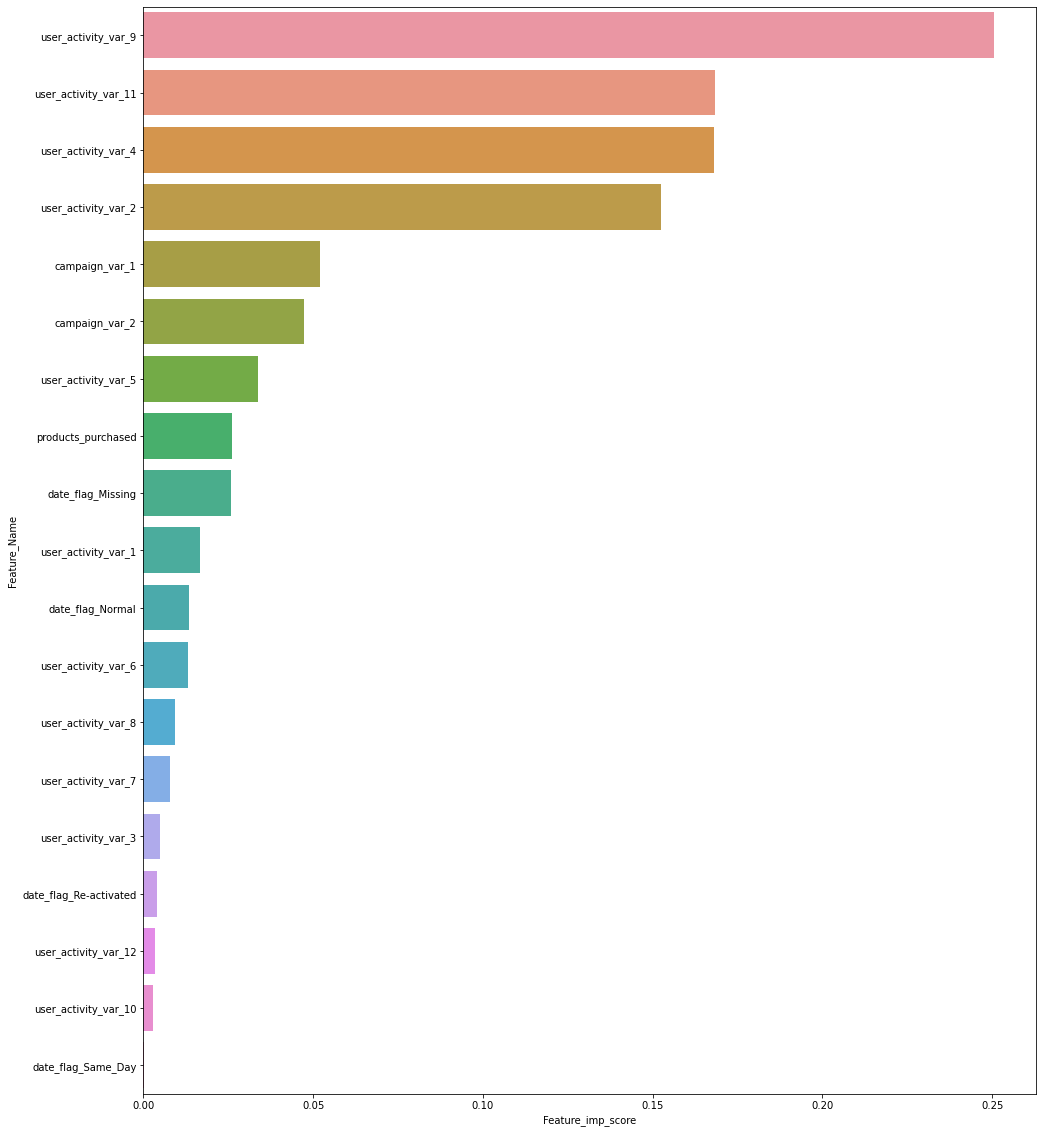

In [50]:
plt.figure(figsize=(16,20))
sns.barplot(ft_imp_df[0:50]['Feature_imp_score'], ft_imp_df[0:50]['Feature_Name'])
plt.show()

In [51]:
metrics.confusion_matrix(y_test, rfclr_final.predict(X_test))

array([[11162,    17],
       [  269,   301]], dtype=int64)

## Inference on unseen test data points

In [52]:
print('sairam')

sairam


In [53]:
test = pd.read_csv('test_Wf7sxXF.csv')
print('# of rows   :', test.shape[0])
print('# of columns:', test.shape[1])
print('\n')
print(test.columns)

# of rows   : 13184
# of columns: 18


Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12'],
      dtype='object')


In [54]:
#Check for NULL values
test.isnull().mean()

id                      0.000000
created_at              0.000000
campaign_var_1          0.000000
campaign_var_2          0.000000
products_purchased      0.617112
signup_date             0.504323
user_activity_var_1     0.000000
user_activity_var_2     0.000000
user_activity_var_3     0.000000
user_activity_var_4     0.000000
user_activity_var_5     0.000000
user_activity_var_6     0.000000
user_activity_var_7     0.000000
user_activity_var_8     0.000000
user_activity_var_9     0.000000
user_activity_var_10    0.000000
user_activity_var_11    0.000000
user_activity_var_12    0.000000
dtype: float64

In [55]:
print(test['created_at'].dtype)
print(test['signup_date'].dtype)
print('\n')
print('Created date:', test['created_at'].head())
print('\n')
print('signup_date:', test['signup_date'].head())

object
object


Created date: 0    2022-01-01
1    2022-01-01
2    2022-01-01
3    2022-01-01
4    2022-01-01
Name: created_at, dtype: object


signup_date: 0    2021-08-17
1    2020-05-21
2           NaN
3    2020-06-22
4    2021-03-10
Name: signup_date, dtype: object


In [56]:
test['created_at']  = pd.to_datetime(test['created_at'], errors='ignore', yearfirst=True)
test['signup_date'] = pd.to_datetime(test['signup_date'], errors='ignore', yearfirst=True)

print(test['created_at'].dtype, test['signup_date'].dtype)

datetime64[ns] datetime64[ns]


In [57]:
test['date_flag'] = test[['created_at', 'signup_date']].apply(map_date_ind, axis=1)

In [58]:
test['date_flag'].value_counts()

Missing         6649
Normal          5928
Re-activated     595
Same_Day          12
Name: date_flag, dtype: int64

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date_flag', ylabel='count'>

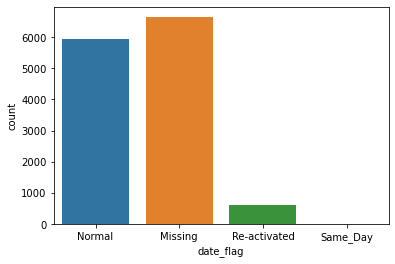

In [59]:
sns.countplot(test['date_flag'])

In [60]:
#Lets fill the missing values with 0 
test['products_purchased'] = test['products_purchased'].fillna(value=0)

In [61]:
test.isnull().mean()

id                      0.000000
created_at              0.000000
campaign_var_1          0.000000
campaign_var_2          0.000000
products_purchased      0.000000
signup_date             0.504323
user_activity_var_1     0.000000
user_activity_var_2     0.000000
user_activity_var_3     0.000000
user_activity_var_4     0.000000
user_activity_var_5     0.000000
user_activity_var_6     0.000000
user_activity_var_7     0.000000
user_activity_var_8     0.000000
user_activity_var_9     0.000000
user_activity_var_10    0.000000
user_activity_var_11    0.000000
user_activity_var_12    0.000000
date_flag               0.000000
dtype: float64

In [62]:
one_hot_encoded_data = pd.get_dummies(test, columns = ['date_flag'])
print(one_hot_encoded_data.columns)
one_hot_encoded_data

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'date_flag_Missing',
       'date_flag_Normal', 'date_flag_Re-activated', 'date_flag_Same_Day'],
      dtype='object')


,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,date_flag_Missing,date_flag_Normal,date_flag_Re-activated,date_flag_Same_Day
0,39162,2022-01-01,2,2,0.0,2021-08-17,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,39164,2022-01-01,8,7,0.0,NaT,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,...,1,0,0,0,2,0,0,1,0,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,16,12,0.0,NaT,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
13180,52342,2022-03-30,12,8,0.0,2022-03-19,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
13182,52344,2022-03-30,14,10,0.0,NaT,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [63]:
X_unseen = one_hot_encoded_data.drop(['id', 'created_at', 'signup_date'], axis=1)

print('Shape of X_unseen is {}'.format(X_unseen.shape))
print(X_unseen.head())

Shape of X_unseen is (13184, 19)
   campaign_var_1  campaign_var_2  products_purchased  user_activity_var_1  \
0               2               2                 0.0                    1   
1               4               7                 3.0                    1   
2               8               7                 0.0                    0   
3               9               8                 2.0                    0   
4               4               5                 2.0                    1   

   user_activity_var_2  user_activity_var_3  user_activity_var_4  \
0                    1                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   user_activity_var_5  user_activity_var_6  user_activity_var_7  \
0                    

#### Apply the final RF model to make inferences on test data

In [64]:
y_hat = rfclr_final.predict(X_unseen)
y_hat

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
submission = pd.read_csv('sample_submission_2zvVjBu.csv')
submission['buy'] = y_hat
submission['buy']

0        1
1        0
2        0
3        1
4        0
        ..
13179    0
13180    0
13181    0
13182    0
13183    0
Name: buy, Length: 13184, dtype: int64

In [66]:
submission['buy'].value_counts()

0    12862
1      322
Name: buy, dtype: int64

In [67]:
submission.to_csv('submission_fin.csv', index=False)